In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
path = "datasets/bitly_usagov/example.txt"

In [4]:
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [5]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [7]:
# The resulting object records is now a list of python dictionaries.

In [9]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [9]:
# Here we can see that not all of the records have a time zone field.

In [10]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [11]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [12]:
# Here we can see that some of the time zones are unknown.

In [13]:
from collections import defaultdict

In [20]:
def get_counts(sequence):
    counts = defaultdict(int) # values will initalize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [21]:
counts = get_counts(time_zones)

In [22]:
counts["America/New_York"]

1251

In [23]:
len(time_zones)

3440

In [24]:
# Next we will get the top 10 time zones and their counts.

In [25]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [26]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [27]:
# Next we will create a dataframe.

In [28]:
frame = pd.DataFrame(records)

In [29]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [30]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [31]:
tz_counts = frame["tz"].value_counts()

In [32]:
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [33]:
# Here we will create a visual in matplotlib and replace missing values with the fillna method.

In [34]:
clean_tz = frame["tz"].fillna("Missing")

In [35]:
clean_tz[clean_tz == ""] = "Unknown"

In [36]:
tz_counts = clean_tz.value_counts()

In [37]:
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [38]:
import seaborn as sns

In [39]:
subset = tz_counts.head()

<Axes: ylabel='tz'>

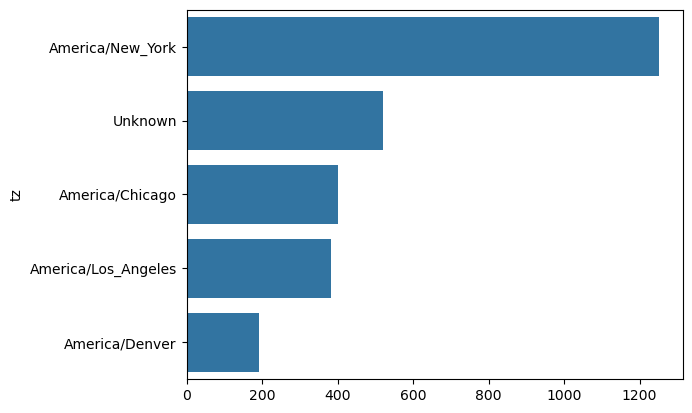

In [40]:
sns.barplot(y=subset.index, x=subset.to_numpy())

In [41]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [42]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [43]:
frame["a"][51][:50] # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [44]:
# Next we will seperate the first token of each string.

In [45]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [46]:
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [47]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [48]:
# Next we will split the data into windows and non windows users.

In [49]:
cframe = frame[frame["a"].notna()].copy()

In [50]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                       "Windows", "Not Windows")

In [51]:
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [52]:
# Next we will group data by time zone column.

In [53]:
by_tz_os = cframe.groupby(["tz", "os"])

In [54]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [55]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [56]:
# We will create an index array sorted in ascending order.

In [57]:
indexer = agg_counts.sum("columns").argsort()

In [58]:
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [59]:
count_subset = agg_counts.take(indexer[-10:])

In [60]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [61]:
# We create a grouped bar plot.

In [62]:
count_subset = count_subset.stack()

In [63]:
count_subset.name = "total"

In [64]:
count_subset = count_subset.reset_index()

In [65]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

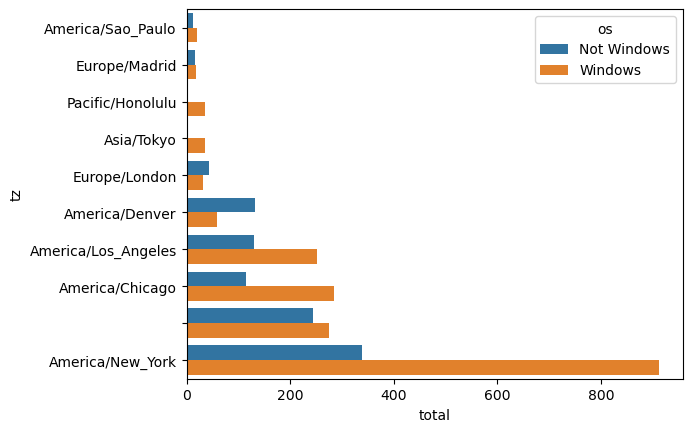

In [66]:
sns.barplot(x="total", y="tz", hue="os", data=count_subset)

In [67]:
# Next we will normalize the group percentages to sum to 1 for easier legibility.

In [68]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

<Axes: xlabel='normed_total', ylabel='tz'>

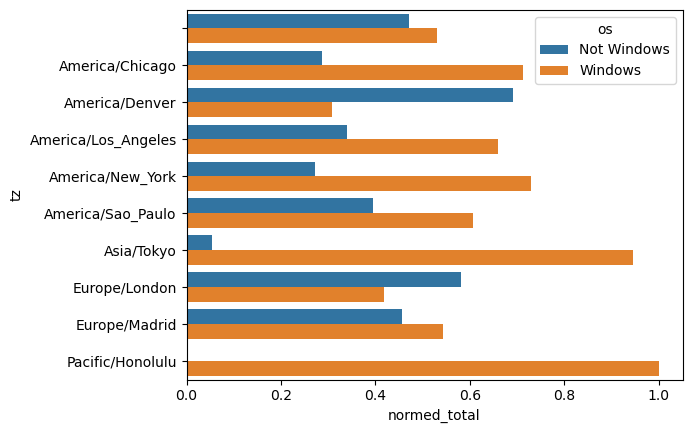

In [69]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)